In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset (make sure this file path is correct)
file_path = r'D:\HPLC data.csv'  # Ensure path is correct
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   Sl No              Age  Gender  Religion   Present District  HbA0  HbA2  \
0      1  14 Yrs 11 month  Female  Hinduism             Howrah  86.2   2.9   
1      2   16 Yrs 0 month  Female  Hinduism            Kolkata  86.4   4.8   
2      3   16 Yrs 2 month    Male  Hinduism            Hooghly  87.3   3.2   
3      4   21 Yrs 0 month  Female  Hinduism  South 24-Parganas  87.9   2.8   
4      5   35 Yrs 3 month    Male  Hinduism   Midnapore (East)  84.3   2.8   

   HbF  S-Window  Unknown   RBC    HB   MCV   MCH  MCHC  RDWcv Weekness  \
0  0.3       0.0      0.0  4.81  13.2  86.7  28.8  33.0   13.8       No   
1  0.4       0.0      0.0  4.18  10.9  78.9  26.1  33.0   14.6       No   
2  0.5       0.0      0.0  5.31  13.6  87.0  25.6  29.4   13.7       No   
3  0.2       0.0      0.0  4.64  11.5  78.7  44.8  31.5   14.5       No   
4  0.2       0.0      0.0  5.50  14.0  69.7  21.5  30.9   16.5       No   

  Jaundice                  Diagnosis  
0       No                   Normal    


In [9]:
# Display the data types of each column
print(data.dtypes)

Sl No                 int64
Age                  object
Gender               object
Religion             object
Present District     object
HbA0                float64
HbA2                float64
HbF                 float64
S-Window            float64
Unknown             float64
RBC                 float64
HB                  float64
MCV                 float64
MCH                 float64
MCHC                float64
RDWcv               float64
Weekness             object
Jaundice             object
Diagnosis            object
dtype: object


In [10]:
# Check for missing values in the dataset
print(data.isnull().sum())

Sl No                0
Age                  6
Gender               0
Religion            36
Present District    14
HbA0                 0
HbA2                 0
HbF                  0
S-Window             0
Unknown              0
RBC                  0
HB                   0
MCV                  0
MCH                  0
MCHC                 0
RDWcv                0
Weekness            10
Jaundice            11
Diagnosis            0
dtype: int64


In [11]:
# Extract the years and months, and convert to total months
data['Age'] = data['Age'].str.extract('(\d+)').astype(float)  # Extract the numeric part of years
data['Age'] = data['Age'].fillna(data['Age'].median())  # Fill missing values with the median

# Display the updated 'Age' column
print(data['Age'].head())

0    14.0
1    16.0
2    16.0
3    21.0
4    35.0
Name: Age, dtype: float64


In [12]:
# Automatically find all numerical columns in the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [13]:
# Fill missing values with the median for numerical columns
data[numerical_columns] = data[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)

# For categorical columns (if any), fill missing values with the mode (most frequent value)
categorical_columns = ['Gender', 'Religion', 'Present District']  # Modify if needed
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Display the number of missing values after filling
print(data.isnull().sum())


Sl No                0
Age                  0
Gender               0
Religion             0
Present District     0
HbA0                 0
HbA2                 0
HbF                  0
S-Window             0
Unknown              0
RBC                  0
HB                   0
MCV                  0
MCH                  0
MCHC                 0
RDWcv                0
Weekness            10
Jaundice            11
Diagnosis            0
dtype: int64


In [14]:
# Fill missing values in 'Weekness' and 'Jaundice' columns with the mode
data['Weekness'] = data['Weekness'].fillna(data['Weekness'].mode()[0])
data['Jaundice'] = data['Jaundice'].fillna(data['Jaundice'].mode()[0])

# Display the number of missing values again to confirm
print(data.isnull().sum())

Sl No               0
Age                 0
Gender              0
Religion            0
Present District    0
HbA0                0
HbA2                0
HbF                 0
S-Window            0
Unknown             0
RBC                 0
HB                  0
MCV                 0
MCH                 0
MCHC                0
RDWcv               0
Weekness            0
Jaundice            0
Diagnosis           0
dtype: int64


In [15]:
# Assuming 'data' is your loaded dataset

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store the range for each numerical column
column_ranges = {}

for column in numerical_columns:
    min_value = data[column].min()
    max_value = data[column].max()
    column_ranges[column] = (min_value, max_value)

# Print the range of each numerical column
print("Range of each numerical column:")
for column, (min_value, max_value) in column_ranges.items():
    print(f"{column}: Min = {min_value}, Max = {max_value}")

Range of each numerical column:
Sl No: Min = 1, Max = 13031
Age: Min = 0.0, Max = 77.0
HbA0: Min = 2.2, Max = 93.4
HbA2: Min = 1.4, Max = 96.2
HbF: Min = 0.0, Max = 93.6
S-Window: Min = 0.0, Max = 80.1
Unknown: Min = 0.0, Max = 88.4
RBC: Min = 0.86, Max = 9.43
HB: Min = 1.1, Max = 41.1
MCV: Min = 8.3, Max = 114.5
MCH: Min = 10.3, Max = 78.8
MCHC: Min = 16.0, Max = 316.0
RDWcv: Min = 9.9, Max = 42.3


In [16]:
# Dictionary to store the count of outliers for each column using Z-score
z_outlier_count = {}

for column in numerical_columns:
    mean = data[column].mean()
    std_dev = data[column].std()
    
    # Calculate Z-scores
    z_scores = (data[column] - mean) / std_dev
    
    # Find outliers (Z-score greater than 3 or less than -3)
    z_outlier_count[column] = (abs(z_scores) > 3).sum()

# Print the count of outliers for each column
print("Outliers count (Z-score Method):")
for column, count in z_outlier_count.items():
    print(f"{column}: {count}")

Outliers count (Z-score Method):
Sl No: 0
Age: 99
HbA0: 576
HbA2: 559
HbF: 40
S-Window: 53
Unknown: 26
RBC: 55
HB: 63
MCV: 48
MCH: 49
MCHC: 7
RDWcv: 182


In [17]:
# Iterate over each numerical column, excluding 'Age'
for column in numerical_columns:
    if column == 'Age':  # Skip the 'Age' column
        continue
    
    mean = data[column].mean()
    std_dev = data[column].std()
    
    # Calculate Z-scores
    z_scores = (data[column] - mean) / std_dev
    
    # Find outliers (Z-score greater than 3 or less than -3)
    outlier_indices = abs(z_scores) > 3
    
    # Replace outliers with the median of the column
    median_value = data[column].median()
    data[column] = data[column].where(~outlier_indices, median_value)

# Print the updated data (optional)
print("Data after replacing outliers with median (excluding 'Age' column):")
print(data.head())

Data after replacing outliers with median (excluding 'Age' column):
   Sl No   Age  Gender  Religion   Present District  HbA0  HbA2  HbF  \
0      1  14.0  Female  Hinduism             Howrah  86.2   2.9  0.3   
1      2  16.0  Female  Hinduism            Kolkata  86.4   4.8  0.4   
2      3  16.0    Male  Hinduism            Hooghly  87.3   3.2  0.5   
3      4  21.0  Female  Hinduism  South 24-Parganas  87.9   2.8  0.2   
4      5  35.0    Male  Hinduism   Midnapore (East)  84.3   2.8  0.2   

   S-Window  Unknown   RBC    HB   MCV   MCH  MCHC  RDWcv Weekness Jaundice  \
0       0.0      0.0  4.81  13.2  86.7  28.8  33.0   13.8       No       No   
1       0.0      0.0  4.18  10.9  78.9  26.1  33.0   14.6       No       No   
2       0.0      0.0  5.31  13.6  87.0  25.6  29.4   13.7       No       No   
3       0.0      0.0  4.64  11.5  78.7  27.9  31.5   14.5       No       No   
4       0.0      0.0  5.50  14.0  69.7  21.5  30.9   16.5       No       No   

                   Diagn

In [18]:
# Find the unique values for each feature in the dataset
unique_values = data.nunique()

# Print the unique values count for each feature
print(unique_values)

Sl No               13031
Age                    67
Gender                  2
Religion                7
Present District       37
HbA0                  183
HbA2                   78
HbF                    50
S-Window                1
Unknown                 1
RBC                   394
HB                    109
MCV                   501
MCH                   226
MCHC                  189
RDWcv                 112
Weekness                2
Jaundice                2
Diagnosis              15
dtype: int64


In [19]:
# Find the unique values for each feature and display their names
unique_values_names = {col: data[col].unique() for col in data.columns}

# Print the unique values names for each feature
for feature, values in unique_values_names.items():
    print(f"Feature: {feature}\nUnique Values: {values}\n")

Feature: Sl No
Unique Values: [    1     2     3 ... 13029 13030 13031]

Feature: Age
Unique Values: [14. 16. 21. 35. 46. 47. 22. 18. 19. 10. 13. 15. 23. 17. 29. 12.  7. 32.
 20.  9.  8. 34. 28. 30. 42. 24. 57. 44. 31. 11. 38. 41. 25. 36.  4. 37.
 26. 27. 50. 33. 51. 40. 53. 39. 52. 67. 49. 58. 45. 48. 54. 43. 55.  5.
 65. 77. 66.  6. 60. 61. 56.  3. 63.  2.  1. 62.  0.]

Feature: Gender
Unique Values: ['Female' 'Male']

Feature: Religion
Unique Values: ['Hinduism' 'Islam' 'Christianity' 'Jainism' 'Sari Dharma' 'Other'
 'Sikhism']

Feature: Present District
Unique Values: ['Howrah' 'Kolkata' 'Hooghly' 'South 24-Parganas' 'Midnapore (East)'
 'North 24-Parganas' 'Nadia' 'Murshidabad' 'Midnapore(West)'
 'Bardhaman (East)' 'Bardhaman (West)' 'Malda' 'Birbhum' 'Jhargram'
 'Dakshin Dinajpur' 'Udhampur' 'Doda' 'Kargil' 'Uttar Dinajpur' 'Bankura'
 'Cooch Behar' 'Jalpaiguri' 'Purulia' 'Darjeeling' 'Kalimpong'
 'Rampurhat HD' 'East Singhbhum' 'Nawada' 'Samba' 'Varanasi' 'Lakhisarai'
 'Kulgam' 'K

In [20]:
# Fixing the 'Diagnosis' column by trimming extra spaces and making it consistent
data['Diagnosis'] = data['Diagnosis'].str.strip()

# Ensure 'Normal' is consistent by replacing any variations of 'Normal' with one
data['Diagnosis'] = data['Diagnosis'].replace(['Normal ', 'Normal   '], 'Normal')

# Display the unique values after cleaning
unique_values = data['Diagnosis'].unique()

print("Unique values in 'Diagnosis' after cleaning:")
print(unique_values)

Unique values in 'Diagnosis' after cleaning:
['Normal' 'Beta Thalassaemia carrier' 'HbE carrier'
 'HbE-Beta Thalassaemia' 'HbS carrier' 'HbD carrier' 'HbD disease'
 'Beta Thalassaemia major' 'HPFH trait' 'HbS-Beta Thalassaemia'
 'HbE disease' 'Beta trait with high foetal haemoglobin'
 'Delta beta carrier']


In [21]:
# Check for NaN values in the entire dataset
print(data.isnull().sum())  # or use data.isnull().sum()

Sl No               0
Age                 0
Gender              0
Religion            0
Present District    0
HbA0                0
HbA2                0
HbF                 0
S-Window            0
Unknown             0
RBC                 0
HB                  0
MCV                 0
MCH                 0
MCHC                0
RDWcv               0
Weekness            0
Jaundice            0
Diagnosis           0
dtype: int64


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode categorical variables
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Religion'] = encoder.fit_transform(data['Religion'])
data['Present District'] = encoder.fit_transform(data['Present District'])
data['Weekness'] = encoder.fit_transform(data['Weekness'])
data['Jaundice'] = encoder.fit_transform(data['Jaundice'])

# Display the first few rows of the encoded columns
print(data[['Gender', 'Religion', 'Present District', 'Weekness', 'Jaundice']].head())

   Gender  Religion  Present District  Weekness  Jaundice
0       0         1                12         0         0
1       0         1                19         0         0
2       1         1                11         0         0
3       0         1                33         0         0
4       1         1                23         0         0


In [23]:
# Encode the 'Diagnosis' column (target feature)
data['Diagnosis'] = encoder.fit_transform(data['Diagnosis'])

# Display the encoded target column
print(data[['Diagnosis']].head())

   Diagnosis
0         12
1          0
2         12
3         12
4         12


In [24]:
# Identify numerical columns (both int and float)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the min and max for each numerical feature
ranges = data[numerical_columns].agg(['min', 'max'])

# Display the ranges
print(ranges)

     Sl No   Age  Gender  Religion  Present District  HbA0  HbA2  HbF  \
min      1   0.0       0         0                 0  64.9   1.4  0.0   
max  13031  77.0       1         6                36  93.4  22.3  5.2   

     S-Window  Unknown   RBC    HB    MCV   MCH  MCHC  RDWcv  Weekness  \
min       0.0      0.0  2.28   6.5   58.8  16.2  19.7    9.9         0   
max       0.0      0.0  6.38  17.1  111.7  39.1  44.4   21.0         1   

     Jaundice  Diagnosis  
min         0          0  
max         1         12  


In [25]:
# Display the data types of each column
print(data.dtypes)

Sl No                 int64
Age                 float64
Gender                int64
Religion              int64
Present District      int64
HbA0                float64
HbA2                float64
HbF                 float64
S-Window            float64
Unknown             float64
RBC                 float64
HB                  float64
MCV                 float64
MCH                 float64
MCHC                float64
RDWcv               float64
Weekness              int64
Jaundice              int64
Diagnosis             int64
dtype: object


In [26]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the standardization and normalization scalers
scaler_normalize = MinMaxScaler()

# Identify numerical columns (both int and float) and remove unwanted columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Exclude columns that are already processed (binary or one-hot encoded columns)
columns_to_exclude = ['Sl No', 'Gender', 'Weekness', 'Jaundice', 'Diagnosis']
numerical_columns_without_exclusions = [col for col in numerical_columns if col not in columns_to_exclude]

# Apply normalization to the numerical columns (excluding the processed ones) and store in another new dataframe
data_normalized = data.copy()  # Create another copy of the original data
data_normalized[numerical_columns_without_exclusions] = scaler_normalize.fit_transform(data[numerical_columns_without_exclusions])

# Now, include all features (transformed and non-transformed) in both data_standardized and data_normalized

# The columns that were not transformed (binary and one-hot encoded columns)
non_transformed_columns = [col for col in data.columns if col in columns_to_exclude]

# Re-attach the non-transformed columns to the standardized and normalized dataframes
data_normalized[non_transformed_columns] = data[non_transformed_columns]

# Display the first few rows of final dataframe
print("\nFinal Normalized Data with All Features:")
print(data_normalized.head())


Final Normalized Data with All Features:
   Sl No       Age  Gender  Religion  Present District      HbA0      HbA2  \
0      1  0.181818       0  0.166667          0.333333  0.747368  0.071770   
1      2  0.207792       0  0.166667          0.527778  0.754386  0.162679   
2      3  0.207792       1  0.166667          0.305556  0.785965  0.086124   
3      4  0.272727       0  0.166667          0.916667  0.807018  0.066986   
4      5  0.454545       1  0.166667          0.638889  0.680702  0.066986   

        HbF  S-Window  Unknown       RBC        HB       MCV       MCH  \
0  0.057692       0.0      0.0  0.617073  0.632075  0.527410  0.550218   
1  0.076923       0.0      0.0  0.463415  0.415094  0.379962  0.432314   
2  0.096154       0.0      0.0  0.739024  0.669811  0.533081  0.410480   
3  0.038462       0.0      0.0  0.575610  0.471698  0.376181  0.510917   
4  0.038462       0.0      0.0  0.785366  0.707547  0.206049  0.231441   

       MCHC     RDWcv  Weekness  Jaundice  D

In [27]:
# Check for NaN values in the entire dataset
print(data_normalized.isna().sum())  # or use data.isnull().sum()

Sl No               0
Age                 0
Gender              0
Religion            0
Present District    0
HbA0                0
HbA2                0
HbF                 0
S-Window            0
Unknown             0
RBC                 0
HB                  0
MCV                 0
MCH                 0
MCHC                0
RDWcv               0
Weekness            0
Jaundice            0
Diagnosis           0
dtype: int64


In [28]:
# Check for NaN values in the entire dataset
print(data_normalized.isnull().sum())  # or use data.isnull().sum()

Sl No               0
Age                 0
Gender              0
Religion            0
Present District    0
HbA0                0
HbA2                0
HbF                 0
S-Window            0
Unknown             0
RBC                 0
HB                  0
MCV                 0
MCH                 0
MCHC                0
RDWcv               0
Weekness            0
Jaundice            0
Diagnosis           0
dtype: int64


In [29]:
# Example: Assuming 'df' is your dataset and 'target' is your target column
X1 = data_normalized.drop(['Diagnosis', 'Sl No', 'HbA0', 'HbA2', 'HbF', 'S-Window', 'Unknown'], axis=1)  # All columns except the target
y1 = data_normalized['Diagnosis']  # The target column

In [30]:
# Display dataset information
print("Dataset Information:")
print(f"Total samples: {len(X1)}")  # Total number of samples
print(f"Total features: {len(X1.columns)}")  # Total number of features
print(f"Target classes: {y1.nunique()}")  # Number of unique classes in the target

# Print the distribution of target classes
print("\nTarget class distribution:")
print(y1.value_counts().sort_index())  # Display the distribution of target classes


Dataset Information:
Total samples: 13031
Total features: 12
Target classes: 13

Target class distribution:
Diagnosis
0       562
1        13
2         6
3         1
4         2
5        25
6         1
7       546
8        20
9        19
10       51
11        2
12    11783
Name: count, dtype: int64


In [31]:
# Assuming X1 is your features dataframe and y1 is your target column

# Combine the features (X1) and target column (y1) into one DataFrame
final_df = X1.copy()
final_df['Diagnosis'] = y1  # Adding the target column to the features

# Save the combined dataframe to D:/ path
final_df.to_csv('D:/dataset_with_features_and_target.csv', index=False)

print("Dataset with features and target has been saved to 'D:/dataset_with_features_and_target.csv'.")

Dataset with features and target has been saved to 'D:/dataset_with_features_and_target.csv'.


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Assuming 'X1' is your feature matrix and 'y1' is your target column
# Here, I'm using the LabelEncoder to encode the target column if needed
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y1)

# Calculate Information Gain for each feature (mutual information)
info_gain = mutual_info_classif(X1, y_encoded)

# Create a DataFrame to display the results
info_gain_df = pd.DataFrame({
    'Feature': X1.columns,
    'Information Gain': info_gain
})

# Sort the features by Information Gain in descending order
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Display the features and their Information Gain
print(info_gain_df)

             Feature  Information Gain
6                MCV          0.128832
7                MCH          0.111522
9              RDWcv          0.039882
4                RBC          0.037192
5                 HB          0.022269
8               MCHC          0.013000
0                Age          0.009380
2           Religion          0.005641
3   Present District          0.002810
10          Weekness          0.002626
1             Gender          0.001739
11          Jaundice          0.001296


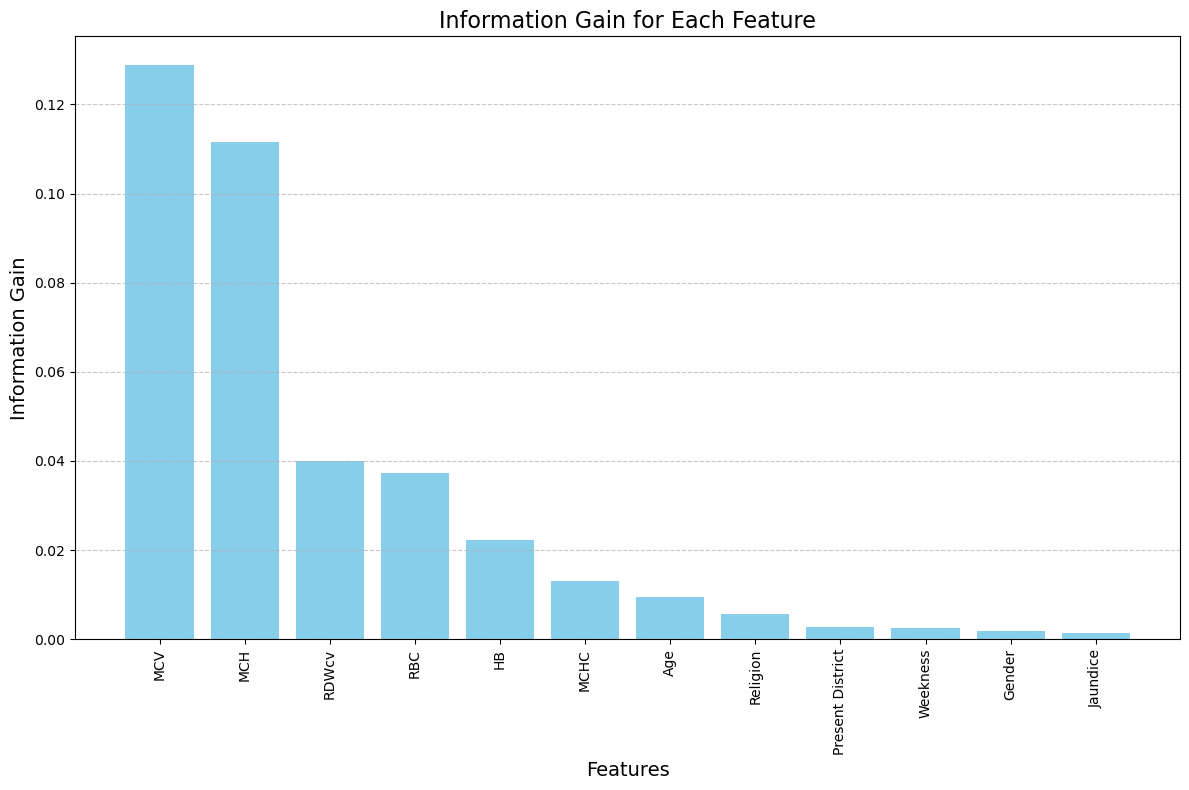

In [33]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Information Gain for better visualization
info_gain_df_sorted = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Plotting the Information Gain as a vertical bar plot
plt.figure(figsize=(12, 8))
plt.bar(info_gain_df_sorted['Feature'], info_gain_df_sorted['Information Gain'], color='skyblue')

# Adding labels and title
plt.title('Information Gain for Each Feature', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Information Gain', fontsize=14)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

All features and their importance values:
Age: 0.0890
Gender: 0.0162
Religion: 0.0187
Present District: 0.0575
RBC: 0.1175
HB: 0.0946
MCV: 0.2155
MCH: 0.1716
MCHC: 0.1092
RDWcv: 0.1085
Weekness: 0.0007
Jaundice: 0.0010

Selected features based on importance threshold:
Age: 0.0890
Present District: 0.0575
RBC: 0.1175
HB: 0.0946
MCV: 0.2155
MCH: 0.1716
MCHC: 0.1092
RDWcv: 0.1085


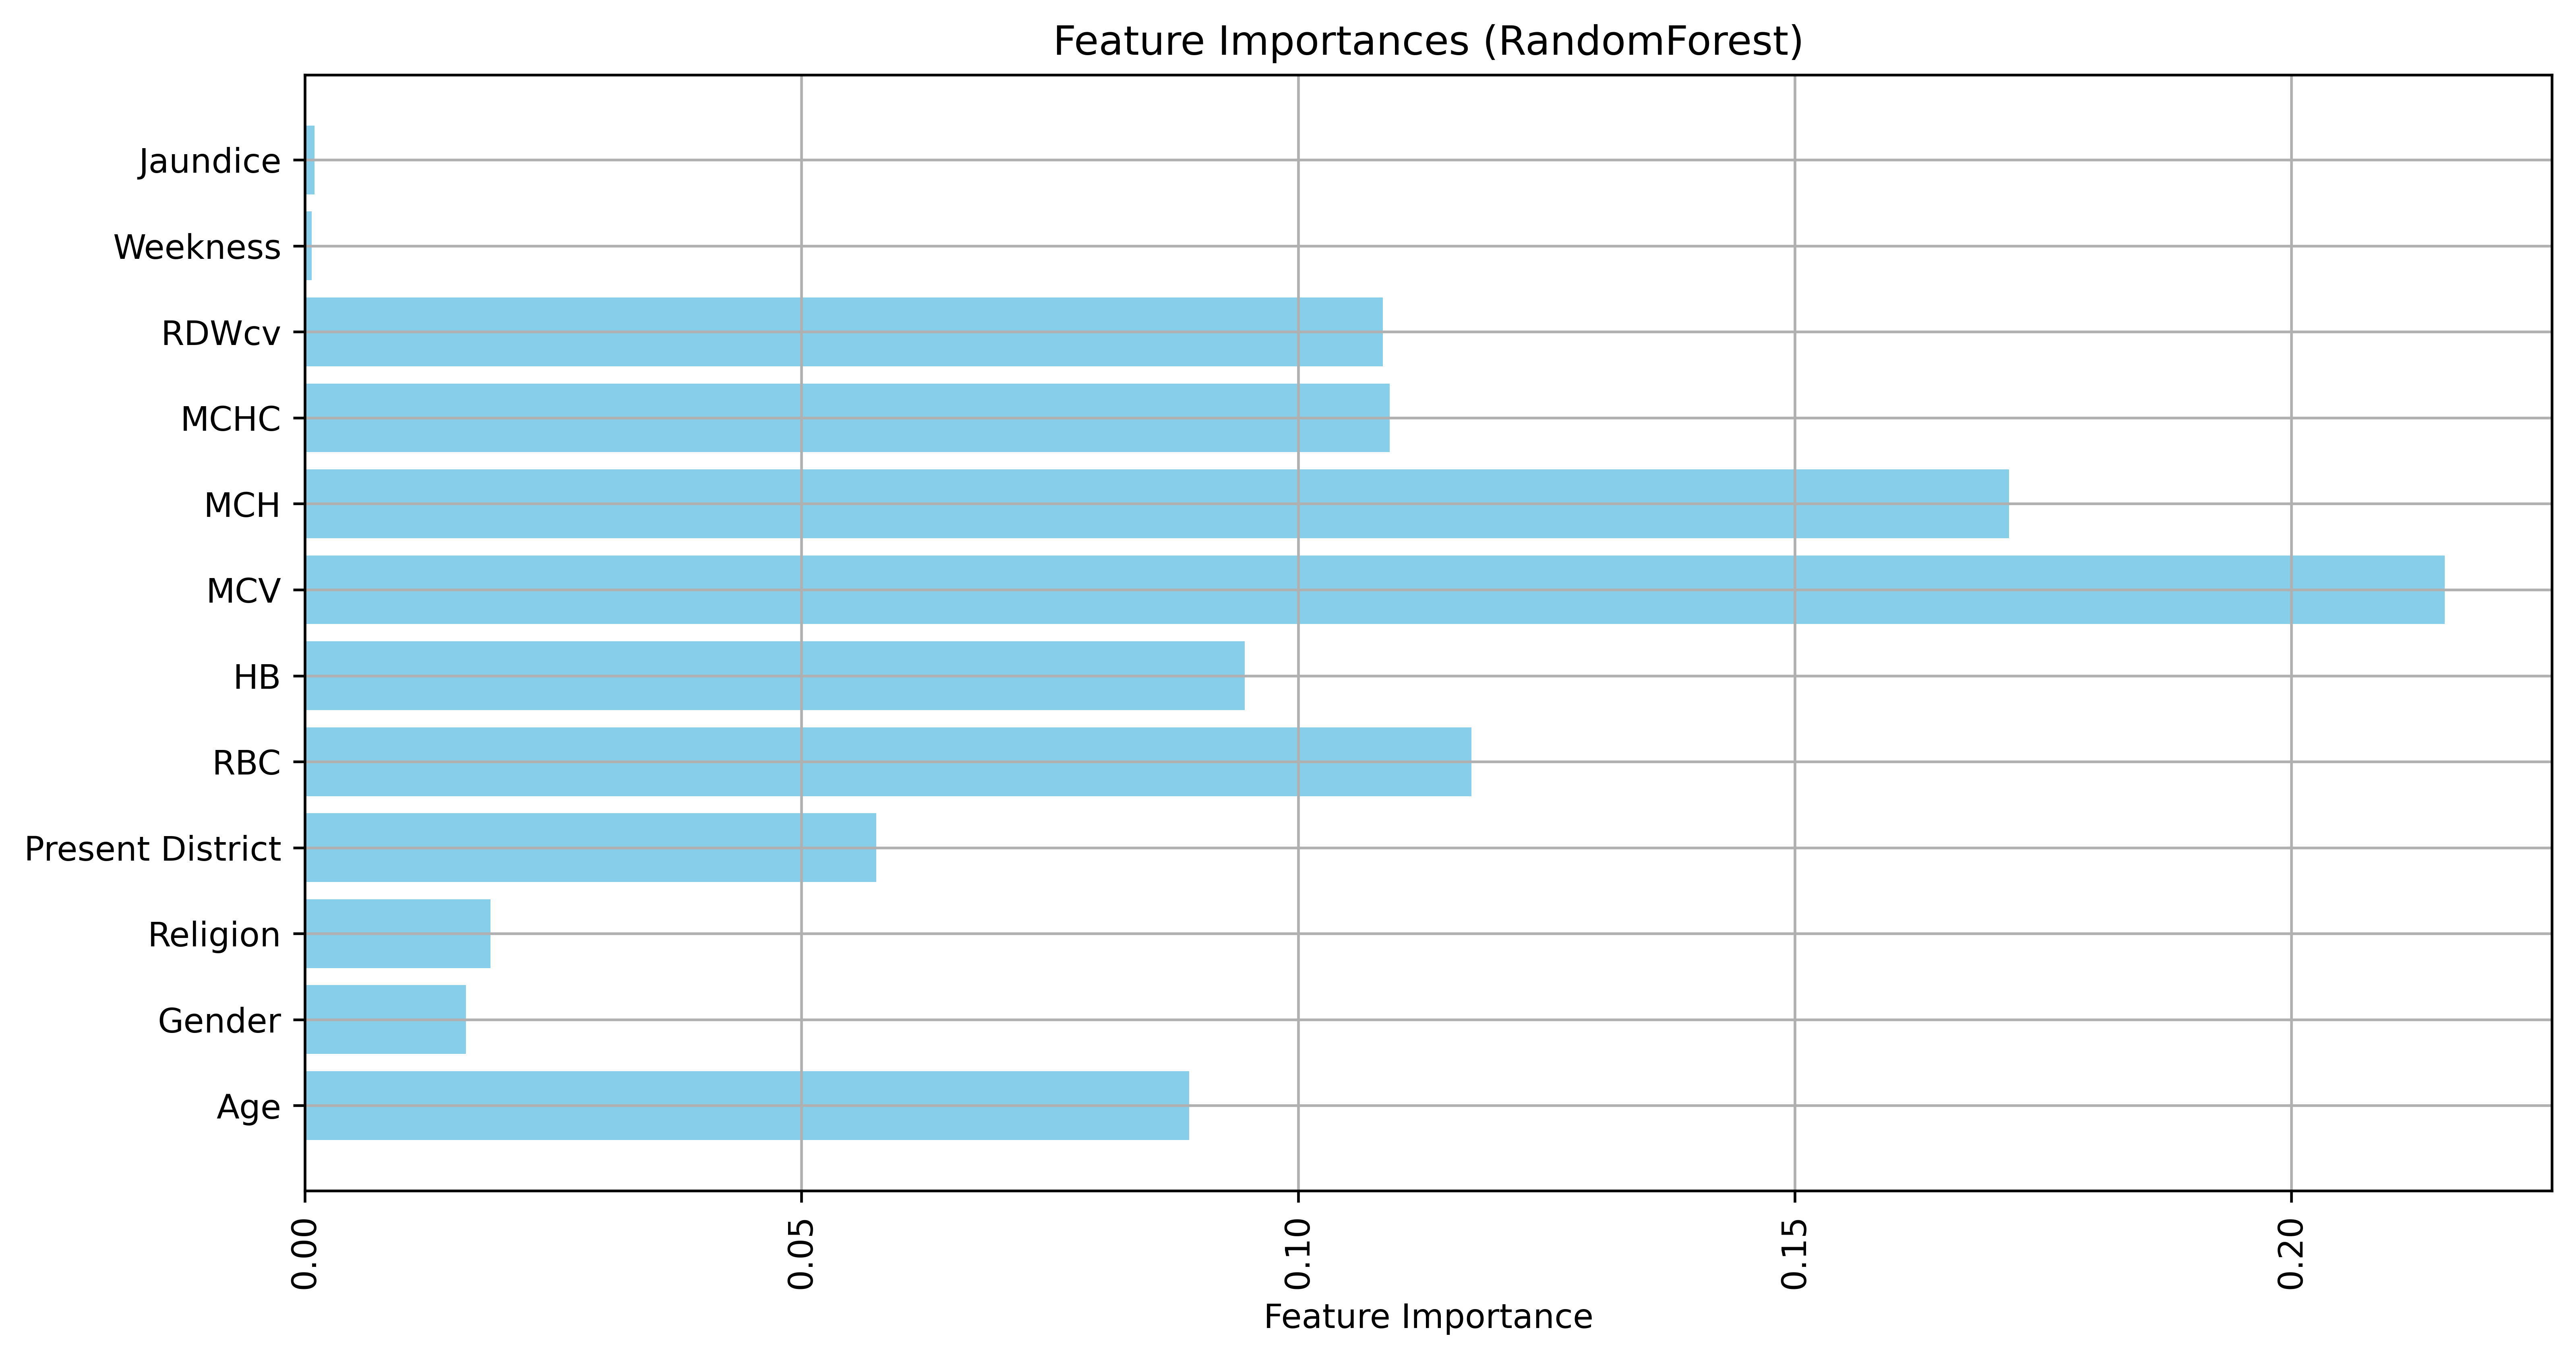

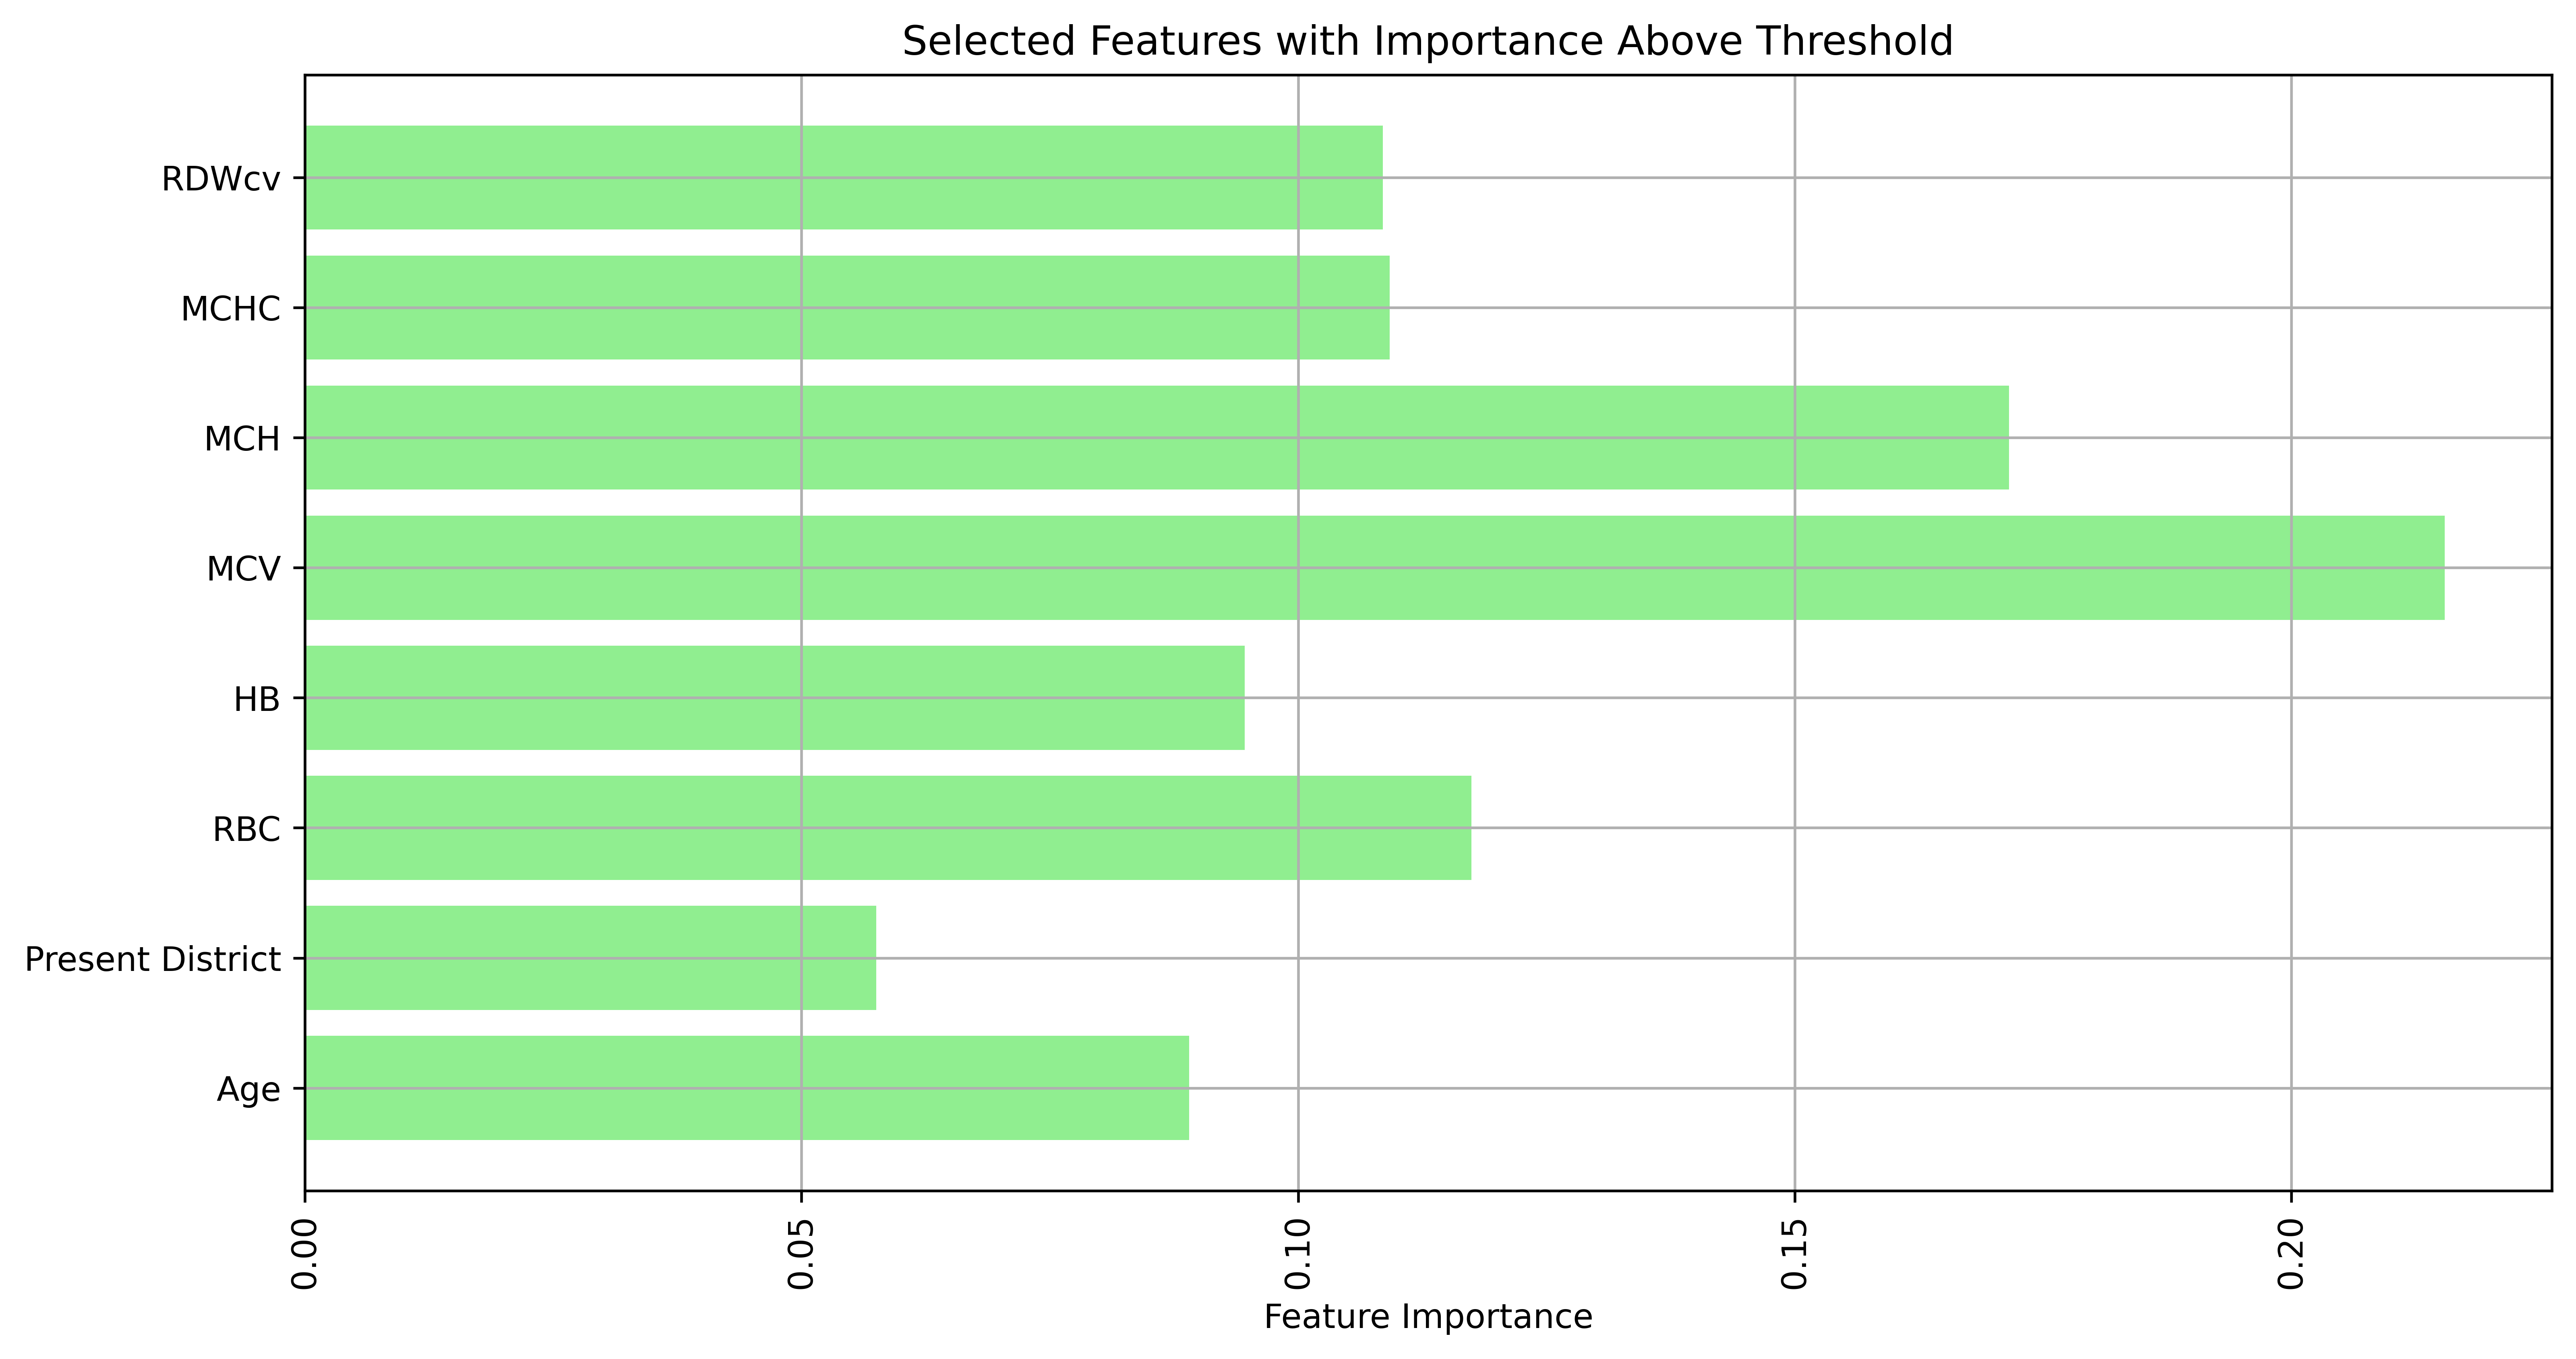

In [34]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'X1' is your features matrix and 'y1' is your target variable

# Train a RandomForest model to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X1, y1)

# Get the feature importances
importances = rf.feature_importances_

# Print all feature importances
print("All features and their importance values:")
for feature, importance in zip(X1.columns, importances):
    print(f"{feature}: {importance:.4f}")

# Set a threshold for feature importance (you can adjust the threshold)
threshold = 0.05  # For example, keep features with importance > 0.05

# Select features above the threshold
selected_features = X1.columns[importances > threshold]

# Print the selected features and their importance values
print("\nSelected features based on importance threshold:")
for feature, importance in zip(selected_features, importances[X1.columns.isin(selected_features)]):
    print(f"{feature}: {importance:.4f}")

# Use the selected features for model training
X1_selected = X1[selected_features]

# Plot feature importances for all features with precise visualization
plt.figure(figsize=(12, 6), dpi=600)
plt.barh(X1.columns, importances, color='skyblue')  # Plot all feature importances
plt.xlabel('Feature Importance')
plt.title('Feature Importances (RandomForest)')
plt.grid(True)
plt.xticks(rotation=90)
plt.savefig("feature_importances_all_600dpi.png", dpi=600, bbox_inches="tight")
plt.show()

# Plot the selected features with their importance
selected_importances = importances[X1.columns.isin(selected_features)]
plt.figure(figsize=(12, 6), dpi=600)
plt.barh(selected_features, selected_importances, color='lightgreen')  # Highlight selected features
plt.xlabel('Feature Importance')
plt.title('Selected Features with Importance Above Threshold')
plt.grid(True)
plt.xticks(rotation=90)
plt.savefig("feature_importances_selected_600dpi.png", dpi=600, bbox_inches="tight")
plt.show()

In [35]:
import pandas as pd

# Assuming X1_selected contains the selected features and y1 contains the target variable
# Combine the selected features and the target variable into one DataFrame
selected_data = pd.concat([X1_selected, y1], axis=1)

# Save the dataset to D:/DWDM DSN path
selected_data.to_csv(r'D:\DWDM DSN\Dataset_without_class_balancing.csv', index=False)

print("Dataset without class balancing has been saved to D:/DWDM DSN/Dataset_without_class_balancing.csv.")

Dataset without class balancing has been saved to D:/DWDM DSN/Dataset_without_class_balancing.csv.


Random Oversampling

In [36]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Load the saved dataset
file_path = r'D:\DWDM DSN\Dataset_without_class_balancing.csv'
data = pd.read_csv(file_path)

# Extract features (X) and target (y)
# Use all columns except 'Diagnosis' as features (X)
X = data.drop(columns=['Diagnosis'])

# Target variable (Diagnosis)
y = data['Diagnosis']

# Convert X to DataFrame if not already
X = pd.DataFrame(X)

# Apply RandomOverSampler for class balancing
ros = RandomOverSampler(random_state=42)

# Apply to the data
X_ros, y_ros = ros.fit_resample(X, y)

# Convert the resampled target variable to Pandas Series for value_counts()
y_ros_series = pd.Series(y_ros)

# Display the class distribution after applying RandomOversampling
print("\nClass distribution after RandomOversampling:")
print(y_ros_series.value_counts())

# If you want to save the resampled data back to a CSV file:
resampled_data = pd.concat([X_ros, y_ros], axis=1)
resampled_data.to_csv(r'D:\DWDM DSN\Dataset_with_class_balancing.csv', index=False)

print("\nResampled dataset has been saved to 'D:/DWDM DSN/Dataset_with_class_balancing.csv'.")


Class distribution after RandomOversampling:
Diagnosis
12    11783
0     11783
7     11783
9     11783
10    11783
5     11783
6     11783
1     11783
4     11783
11    11783
8     11783
2     11783
3     11783
Name: count, dtype: int64

Resampled dataset has been saved to 'D:/DWDM DSN/Dataset_with_class_balancing.csv'.
